In [1]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

C:\Users\koushal\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Loading the Training and Test Datasets
df_training = pd.read_csv('ann_train.csv', header=None)
df_test = pd.read_csv('ann_test.csv', header=None)
ytrain = df_training.iloc[:,0]
ytest = df_test.iloc[:,0]
df_training.drop(df_training.columns[[0]], axis=1, inplace=True)
df_test.drop(df_test.columns[[0]], axis=1, inplace=True)

In [3]:
#PreProcess the input Data
df_training = df_training.values
df_test = df_test.values
xtrain = df_training.reshape(-1,28,28)
xtest = df_test.reshape(-1,28,28)
xtrain = xtrain/255
xtest = xtest/255

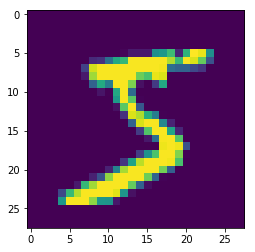

In [4]:
#display the images
plt.imshow(xtrain[0])


In [ ]:
plt.imshow(xtest[0])

In [11]:
xtrain = xtrain.reshape(xtrain.shape[0],28,28,1)

In [12]:
xtrain.shape

(60000, 28, 28, 1)

In [5]:
#PreProcess Class Labels
ytrain = np_utils.to_categorical(ytrain, 10)
ytest = np_utils.to_categorical(ytest, 10)

In [6]:
#Define Model Architecture
model = Sequential()

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#model.output_shape
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

C:\Users\koushal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
C:\Users\koushal\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  


In [7]:
#Compiling the Model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
#Fit Keras Model
model.fit(xtrain, ytrain, 
          batch_size=32, nb_epoch=10, verbose=1)

C:\Users\koushal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
60000/60000 [==============================] - 198s 3ms/step - loss: 0.2018 - acc: 0.9385 1s - loss: 0.2
Epoch 2/10
60000/60000 [==============================] - 205s 3ms/step - loss: 0.0851 - acc: 0.9742
Epoch 3/10
60000/60000 [==============================] - 247s 4ms/step - loss: 0.0674 - acc: 0.9790
Epoch 4/10
60000/60000 [==============================] - 197s 3ms/step - loss: 0.0571 - acc: 0.9829 1s - loss: 0.057
Epoch 5/10
60000/60000 [==============================] - 196s 3ms/step - loss: 0.0479 - acc: 0.9850
Epoch 6/10
60000/60000 [==============================] - 193s 3ms/step - loss: 0.0401 - acc: 0.9879
Epoch 7/10
60000/60000 [==============================] - 206s 3ms/step - loss: 0.0372 - acc: 0.9885
Epoch 8/10
60000/60000 [==============================] - 215s 4ms/step - loss: 0.0338 - acc: 0.9894
Epoch 9/10
60000/60000 [==============================] - 202s 3ms/step - loss: 0.0306 - acc: 0.9904
Epoch 10/10
60000/60000 [==============================] - 

In [ ]:
model.layers

In [ ]:
np.resize(xtrain,(-1, 60000,28,28))

In [19]:
xtest = xtest.reshape(xtest.shape[0],28,28,1)

In [23]:
# 10. Evaluate model on test datascore
score= model.evaluate(xtest, ytest,verbose=0)

In [21]:
score

[0.024120102600112842, 0.9929]

In [24]:
score1= model.evaluate(xtrain, ytrain, verbose=0)

In [22]:
model.fit(xtest, ytest, 
          batch_size=32, nb_epoch=10, verbose=1)

C:\Users\koushal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/10
10000/10000 [==============================] - 35s 3ms/step - loss: 0.0523 - acc: 0.9853
Epoch 2/10
10000/10000 [==============================] - 33s 3ms/step - loss: 0.0339 - acc: 0.9881
Epoch 3/10
10000/10000 [==============================] - 39s 4ms/step - loss: 0.0217 - acc: 0.9934
Epoch 4/10
10000/10000 [==============================] - 37s 4ms/step - loss: 0.0194 - acc: 0.9938
Epoch 5/10
10000/10000 [==============================] - 36s 4ms/step - loss: 0.0167 - acc: 0.9940
Epoch 6/10
10000/10000 [==============================] - 36s 4ms/step - loss: 0.0159 - acc: 0.9942
Epoch 7/10
10000/10000 [==============================] - 37s 4ms/step - loss: 0.0173 - acc: 0.9936
Epoch 8/10
10000/10000 [==============================] - 36s 4ms/step - loss: 0.0127 - acc: 0.9955: 2s - loss: 0.
Epoch 9/10
10000/10000 [==============================] - 36s 4ms/step - loss: 0.0130 - acc: 0.9959
Epoch 10/10
10000/10000 [==============================] - 36s 4ms/step - loss: 0.009

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

In [25]:
score1

[0.015487045173343783, 0.9953666666666666]